In [3]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt


In [10]:
def real_func(x):
    return np.sin(2*np.pi*x)
def fit_func(p,x):
    f=  np.poly1d(p)
    return f(x)
def residuals_func(p, x, y):
    ret = fit_func(p, x) -y
    return ret

In [11]:
x = np.linspace(0,1,10)
x_points = np.linspace(0, 1, 1000)
y_ = real_func(x)
y = [np.random.normal(0,0.1) + y1 for y1 in y_]

def fitting(M=0):
    
    p_init = np.random.rand(M+1)
    p_lsq = leastsq(residuals_func, p_init, args = (x, y))
    print('Fitting Parameters:', p_lsq[0])
    
    plt.plot(x_points, real_func(x_points), label ='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label = 'fitted curve')
    plt.plot(x, y, 'bo', label  = 'noise')
    plt.legend()
    return p_lsq

Fitting Parameters: [-0.03326688]


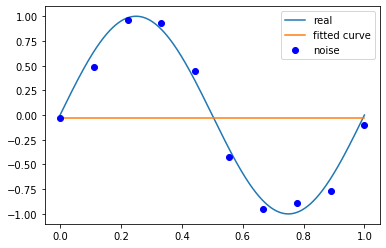

In [12]:
p_lsq_0 = fitting(M=0)

Fitting Parameters: [-1.3770399   0.65525307]


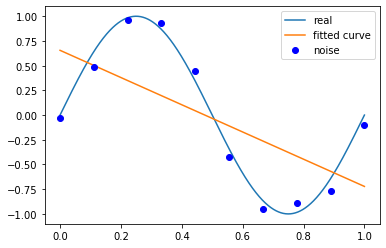

In [14]:
p_lsq_1 = fitting(M=1)

Fitting Parameters: [ 21.03314716 -31.98555271  11.02950917  -0.13638639]


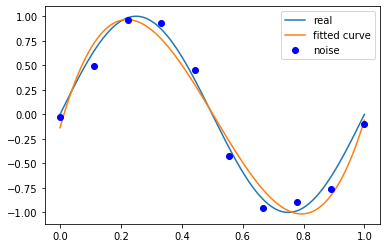

In [15]:
p_lsq_3 = fitting(M =3)

Fitting Parameters: [-7.69889382e+03  3.67677630e+04 -7.32099465e+04  7.88214148e+04
 -4.98558625e+04  1.89060544e+04 -4.20119007e+03  4.87800570e+02
 -1.72111995e+01 -2.82833131e-02]


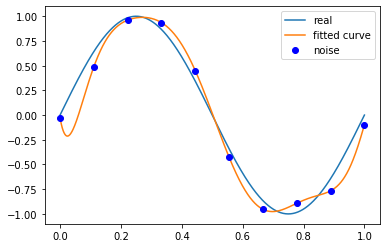

In [16]:
p_lsq_9 = fitting(M =9)

In [19]:
# 正则化
regularization = 0.0001

def residuals_func_regularization(p, x, y):
    ret = fit_func(p,x) - y
    ret = np.append(ret, np.sqrt(0.5 * regularization * np.square(p)))
    return ret

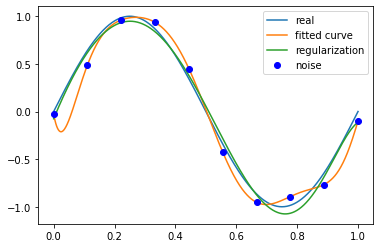

In [21]:
p_init = np.random.rand(9+1)
p_lsq_regularization = leastsq(residuals_func_regularization, p_init, args = (x,y))
plt.plot(x_points, real_func(x_points), label = 'real')
plt.plot(x_points, fit_func(p_lsq_9[0], x_points), label = 'fitted curve')
plt.plot(x_points, fit_func(p_lsq_regularization[0], x_points), label = 'regularization')
plt.plot(x, y, 'bo', label = 'noise')
plt.legend()